In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


MovieWriter ffmpeg unavailable; using Pillow instead.


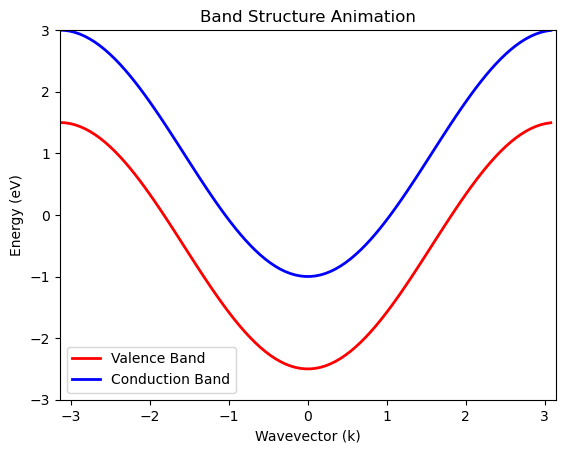

In [5]:

# Define constants
t = 1  # Hopping energy (eV)
k_vals = np.linspace(-np.pi, np.pi, 100)  # k-space points

# Band structure equation: E = -2t * cos(k)
def compute_band(k):
    return -2 * t * np.cos(k)

# Compute conduction and valence bands
energy_vals = compute_band(k_vals)
valence_band = energy_vals - 0.5  # Shift down
conduction_band = energy_vals + 1  # Shift up (bandgap)

# Animation function
fig, ax = plt.subplots()
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-3, 3)
ax.set_xlabel("Wavevector (k)")
ax.set_ylabel("Energy (eV)")
ax.set_title("Band Structure Animation")

valence_line, = ax.plot([], [], "r-", lw=2, label="Valence Band")
conduction_line, = ax.plot([], [], "b-", lw=2, label="Conduction Band")

def init():
    valence_line.set_data([], [])
    conduction_line.set_data([], [])
    return valence_line, conduction_line

def update(frame):
    k_subset = k_vals[:frame]
    v_subset = valence_band[:frame]
    c_subset = conduction_band[:frame]

    valence_line.set_data(k_subset, v_subset)
    conduction_line.set_data(k_subset, c_subset)
    return valence_line, conduction_line

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(k_vals), init_func=init, blit=True, interval=50)

# Save animation as a short video
ani.save("band_structure.gif", writer="ffmpeg", fps=30)

plt.legend()
plt.show()
